XGBoost - Average Accuracy: 0.6153, Average F1 Score: 0.6088
Gradient Boosting - Average Accuracy: 0.6260, Average F1 Score: 0.6148


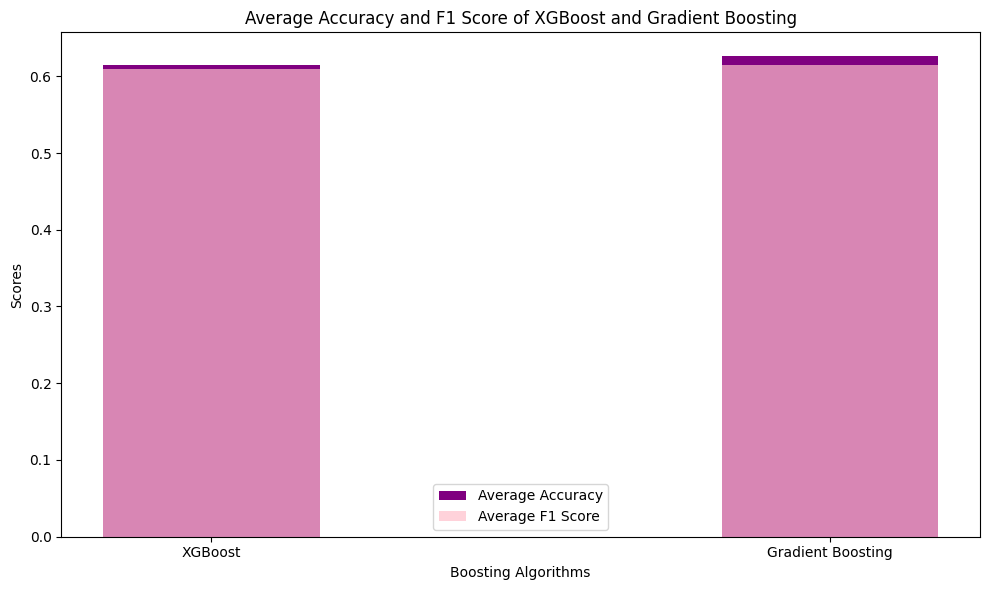

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings'] - 1  # Adjust target labels to start from 0
    return X, y

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a model, returning accuracy and F1 score.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

def boosting_experiment(X, y, n_experiments=10):
    """
    Run multiple experiments to compare accuracy of XGBoost and Gradient Boosting,
    and calculate the average accuracy and F1 score.
    """
    xgb_accuracies, xgb_f1_scores = [], []
    gb_accuracies, gb_f1_scores = [], []

    # Run multiple experiments
    for i in range(n_experiments):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        # Initialize models
        xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
        gb_model = GradientBoostingClassifier(random_state=42)

        # Evaluate XGBoost
        xgb_accuracy, xgb_f1 = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
        xgb_accuracies.append(xgb_accuracy)
        xgb_f1_scores.append(xgb_f1)

        # Evaluate Gradient Boosting
        gb_accuracy, gb_f1 = evaluate_model(gb_model, X_train, X_test, y_train, y_test)
        gb_accuracies.append(gb_accuracy)
        gb_f1_scores.append(gb_f1)

    # Calculate average scores
    avg_xgb_accuracy = np.mean(xgb_accuracies)
    avg_xgb_f1 = np.mean(xgb_f1_scores)
    avg_gb_accuracy = np.mean(gb_accuracies)
    avg_gb_f1 = np.mean(gb_f1_scores)

    print(f"XGBoost - Average Accuracy: {avg_xgb_accuracy:.4f}, Average F1 Score: {avg_xgb_f1:.4f}")
    print(f"Gradient Boosting - Average Accuracy: {avg_gb_accuracy:.4f}, Average F1 Score: {avg_gb_f1:.4f}")

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    boosting_experiment(X, y, n_experiments=10)
